In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB

In [28]:
df = pd.read_csv("data/proj8/spam.csv")

In [29]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
df["Category"].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["Category"]  = le.fit_transform(df["Category"])

In [32]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
from sklearn.model_selection import train_test_split

cve = CountVectorizer()


X = df["Message"]
y = df["Category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
X_train = cve.fit_transform(X_train.values)

In [35]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
X_train

<4457x7721 sparse matrix of type '<class 'numpy.int64'>'
	with 58855 stored elements in Compressed Sparse Row format>

In [37]:
berNB = BernoulliNB()

berNB.fit(X_train, y_train)

BernoulliNB()

In [38]:
X_test = cve.transform(X_test.values)

In [39]:
berNB.score(X_test, y_test)

0.97847533632287

In [40]:
from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(berNB, X_train, y_train)

In [41]:
cv_results

array([0.96860987, 0.98206278, 0.97867565, 0.97306397, 0.98092031])

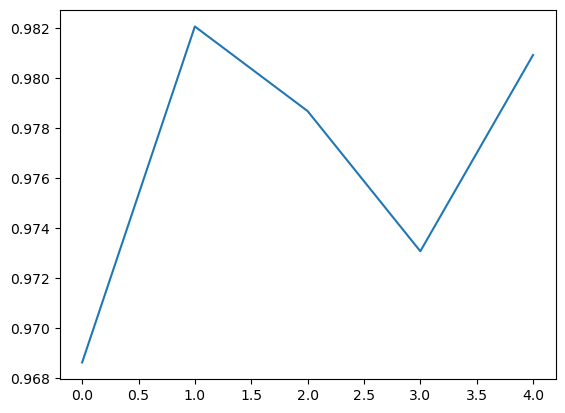

In [42]:
import matplotlib.pyplot as plt

plt.plot(cv_results)